In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('C:/Users/Admin/Desktop/sarika_manisha_datascene_projects/nitesh_datascience_project/chest_xray'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

C:/Users/Admin/Desktop/sarika_manisha_datascene_projects/nitesh_datascience_project/chest_xray\.ipynb_checkpoints\val-checkpoint.ipynb
C:/Users/Admin/Desktop/sarika_manisha_datascene_projects/nitesh_datascience_project/chest_xray\test\.DS_Store
C:/Users/Admin/Desktop/sarika_manisha_datascene_projects/nitesh_datascience_project/chest_xray\test\CANCER\person100_bacteria_475.jpeg
C:/Users/Admin/Desktop/sarika_manisha_datascene_projects/nitesh_datascience_project/chest_xray\test\CANCER\person100_bacteria_477.jpeg
C:/Users/Admin/Desktop/sarika_manisha_datascene_projects/nitesh_datascience_project/chest_xray\test\CANCER\person100_bacteria_478.jpeg
C:/Users/Admin/Desktop/sarika_manisha_datascene_projects/nitesh_datascience_project/chest_xray\test\CANCER\person100_bacteria_479.jpeg
C:/Users/Admin/Desktop/sarika_manisha_datascene_projects/nitesh_datascience_project/chest_xray\test\CANCER\person100_bacteria_480.jpeg
C:/Users/Admin/Desktop/sarika_manisha_datascene_projects/nitesh_datascience_proj

C:/Users/Admin/Desktop/sarika_manisha_datascene_projects/nitesh_datascience_project/chest_xray\train\CANCER\person536_virus_1064.jpeg
C:/Users/Admin/Desktop/sarika_manisha_datascene_projects/nitesh_datascience_project/chest_xray\train\CANCER\person536_virus_1065.jpeg
C:/Users/Admin/Desktop/sarika_manisha_datascene_projects/nitesh_datascience_project/chest_xray\train\CANCER\person537_bacteria_2261.jpeg
C:/Users/Admin/Desktop/sarika_manisha_datascene_projects/nitesh_datascience_project/chest_xray\train\CANCER\person537_bacteria_2262.jpeg
C:/Users/Admin/Desktop/sarika_manisha_datascene_projects/nitesh_datascience_project/chest_xray\train\CANCER\person537_bacteria_2263.jpeg
C:/Users/Admin/Desktop/sarika_manisha_datascene_projects/nitesh_datascience_project/chest_xray\train\CANCER\person537_bacteria_2264.jpeg
C:/Users/Admin/Desktop/sarika_manisha_datascene_projects/nitesh_datascience_project/chest_xray\train\CANCER\person537_bacteria_2265.jpeg
C:/Users/Admin/Desktop/sarika_manisha_datascene

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
import cv2
import os

Using TensorFlow backend.


In [3]:
labels = ['CANCER', 'NORMAL']
img_size = 150
def get_training_data(data_dir):
    data = [] 
    for label in labels: 
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data)

In [4]:
train = get_training_data('C:/Users/Admin/Desktop/sarika_manisha_datascene_projects/nitesh_datascience_project/chest_xray/train')
test = get_training_data('C:/Users/Admin/Desktop/sarika_manisha_datascene_projects/nitesh_datascience_project/chest_xray/test')
val = get_training_data('C:/Users/Admin/Desktop/sarika_manisha_datascene_projects/nitesh_datascience_project/chest_xray/val')

OpenCV(4.2.0) C:\projects\opencv-python\opencv\modules\imgproc\src\resize.cpp:4045: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'

OpenCV(4.2.0) C:\projects\opencv-python\opencv\modules\imgproc\src\resize.cpp:4045: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'

OpenCV(4.2.0) C:\projects\opencv-python\opencv\modules\imgproc\src\resize.cpp:4045: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'

OpenCV(4.2.0) C:\projects\opencv-python\opencv\modules\imgproc\src\resize.cpp:4045: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'



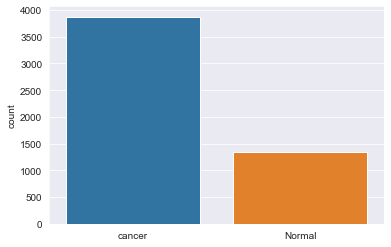

In [5]:
l = []
for i in train:
    if(i[1] == 0):
        l.append("cancer")
    else:
        l.append("Normal")
sns.set_style('darkgrid')
sns.countplot(l)   

Text(0.5, 1.0, 'NORMAL')

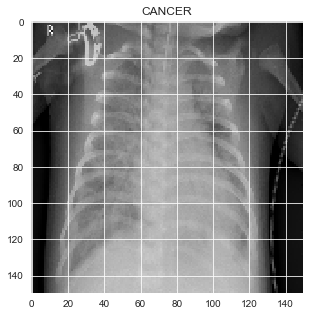

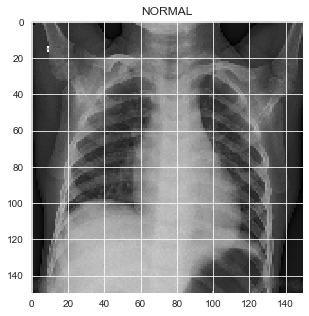

In [6]:
plt.figure(figsize = (5,5))
plt.imshow(train[0][0], cmap='gray')
plt.title(labels[train[0][1]])

plt.figure(figsize = (5,5))
plt.imshow(train[-1][0], cmap='gray')
plt.title(labels[train[-1][1]])

In [7]:
x_train = []
y_train = []

x_val = []
y_val = []

x_test = []
y_test = []

for feature, label in train:
    x_train.append(feature)
    y_train.append(label)

for feature, label in test:
    x_test.append(feature)
    y_test.append(label)
    
for feature, label in val:
    x_val.append(feature)
    y_val.append(label)

In [8]:
# Normalize the data
x_train = np.array(x_train) / 255
x_val = np.array(x_val) / 255
x_test = np.array(x_test) / 255

In [9]:
# resize data for deep learning 
x_train = x_train.reshape(-1, img_size, img_size, 1)
y_train = np.array(y_train)

x_val = x_val.reshape(-1, img_size, img_size, 1)
y_val = np.array(y_val)

x_test = x_test.reshape(-1, img_size, img_size, 1)
y_test = np.array(y_test)

In [10]:
# With data augmentation to prevent overfitting and handling the imbalance in dataset

datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range = 30,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.2, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip = False,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(x_train)

In [11]:
model = Sequential()
model.add(Conv2D(32 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu' , input_shape = (150,150,1)))
model.add(MaxPool2D((2,2) ,   strides = 2 , padding = 'same'))
model.add(Conv2D(64 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(MaxPool2D((2,2) ,   strides = 2 , padding = 'same'))
model.add(Conv2D(64 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(MaxPool2D((2,2) ,   strides = 2 , padding = 'same'))
model.add(Conv2D(128 , (3,3) ,strides = 1 , padding = 'same' , activation = 'relu'))
model.add(MaxPool2D((2,2) ,   strides = 2 , padding = 'same'))
model.add(Conv2D(256 , (3,3) ,strides = 1 , padding = 'same' , activation = 'relu'))
model.add(MaxPool2D((2,2) ,   strides = 2 , padding = 'same'))
model.add(Flatten())
model.add(Dense(units = 128 , activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(units = 1 , activation = 'sigmoid'))
model.compile(optimizer = 'adam' , loss = 'binary_crossentropy' , metrics = ['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 150, 150, 32)      320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 75, 75, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 38, 38, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 38, 38, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 19, 19, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 19, 19, 128)      

In [13]:
history = model.fit(datagen.flow(x_train,y_train, batch_size = 32) ,epochs = 10 , validation_data = datagen.flow(x_val, y_val))

Epoch 1/10
163/163 [==============================] - 58s 353ms/step - loss: 0.5318 - accuracy: 0.7498 - val_loss: 0.6836 - val_accuracy: 0.8125
Epoch 2/10
163/163 [==============================] - 58s 355ms/step - loss: 0.3914 - accuracy: 0.8062 - val_loss: 1.0666 - val_accuracy: 0.6250
Epoch 3/10
163/163 [==============================] - 56s 344ms/step - loss: 0.2959 - accuracy: 0.8715 - val_loss: 1.3628 - val_accuracy: 0.5625
Epoch 4/10
163/163 [==============================] - 53s 324ms/step - loss: 0.2431 - accuracy: 0.9013 - val_loss: 1.0562 - val_accuracy: 0.6250
Epoch 5/10
163/163 [==============================] - 55s 336ms/step - loss: 0.2141 - accuracy: 0.9141 - val_loss: 1.0332 - val_accuracy: 0.8125
Epoch 6/10
163/163 [==============================] - 56s 343ms/step - loss: 0.2092 - accuracy: 0.9147 - val_loss: 0.9433 - val_accuracy: 0.7500
Epoch 7/10
163/163 [==============================] - 53s 324ms/step - loss: 0.1887 - accuracy: 0.9275 - val_loss: 0.8370 - val_ac

In [14]:
print("Loss of the model is - " , model.evaluate(x_test,y_test)[0]*100 , "%")
print("Accuracy of the model is - " , model.evaluate(x_test,y_test)[1]*100 , "%")

624/624 [==============================] - 2s 3ms/step
Loss of the model is -  36.59275193244983 %
624/624 [==============================] - 2s 3ms/step
Accuracy of the model is -  90.38461446762085 %


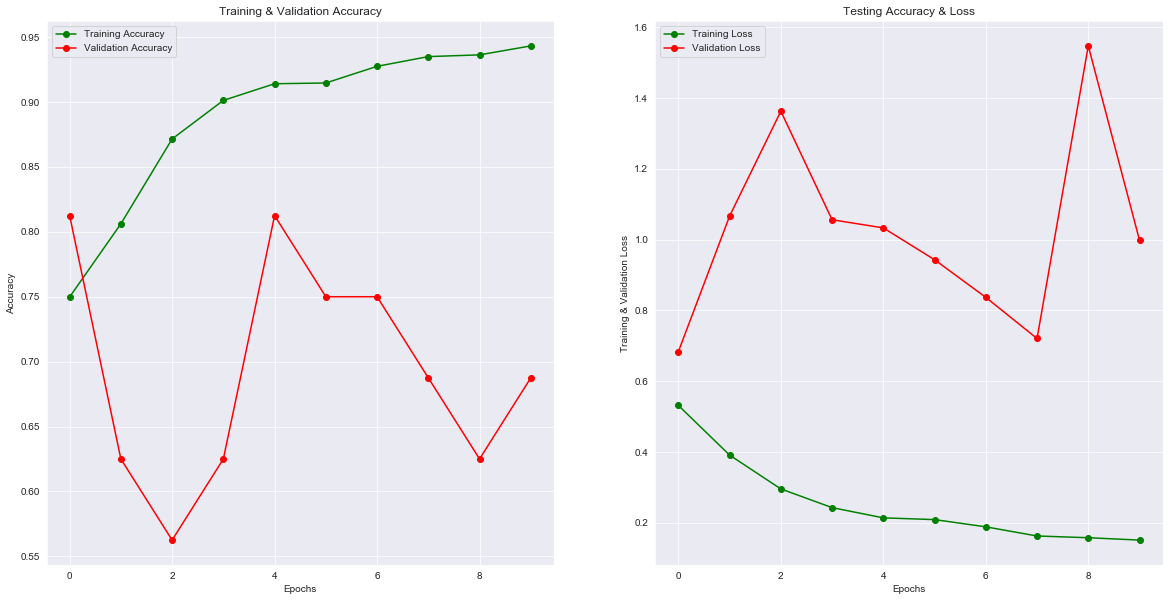

In [15]:
epochs = [i for i in range(10)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
fig.set_size_inches(20,10)

ax[0].plot(epochs , train_acc , 'go-' , label = 'Training Accuracy')
ax[0].plot(epochs , val_acc , 'ro-' , label = 'Validation Accuracy')
ax[0].set_title('Training & Validation Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs , train_loss , 'g-o' , label = 'Training Loss')
ax[1].plot(epochs , val_loss , 'r-o' , label = 'Validation Loss')
ax[1].set_title('Testing Accuracy & Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Training & Validation Loss")
plt.show()

In [16]:
predictions = model.predict_classes(x_test)
predictions = predictions.reshape(1,-1)[0]
predictions[:15]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [17]:
print(classification_report(y_test, predictions, target_names = ['cancer (Class 0)','Normal (Class 1)']))

                  precision    recall  f1-score   support

cancer (Class 0)       0.88      0.98      0.93       390
Normal (Class 1)       0.96      0.78      0.86       234

        accuracy                           0.90       624
       macro avg       0.92      0.88      0.89       624
    weighted avg       0.91      0.90      0.90       624



In [18]:
cm = confusion_matrix(y_test,predictions)
cm

array([[382,   8],
       [ 52, 182]], dtype=int64)

In [19]:
cm = pd.DataFrame(cm , index = ['0','1'] , columns = ['0','1'])


In [20]:
cm

,0,1
0,382,8
1,52,182


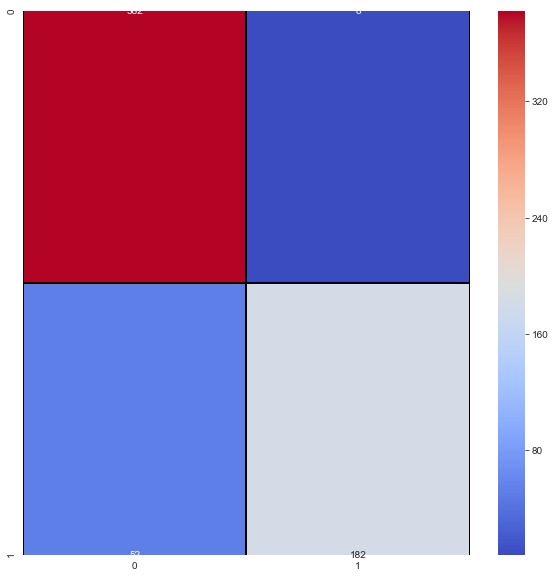

In [21]:
plt.figure(figsize = (10,10))
sns.heatmap(cm,cmap= "coolwarm", linecolor = 'black' , linewidth = 1 , annot = True, fmt='')

In [22]:
correct = np.nonzero(predictions == y_test)[0]
incorrect = np.nonzero(predictions != y_test)[0]

# correct prediction images

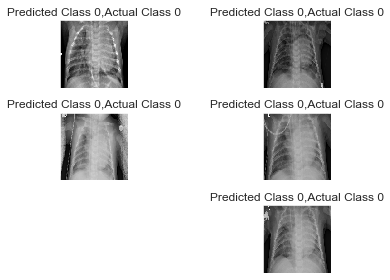

In [23]:
i = 0
for c in correct[:6]:
    plt.subplot(3,2,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_test[c].reshape(150,150), cmap="gray", interpolation='none')
    plt.title("Predicted Class {},Actual Class {}".format(predictions[c], y_test[c]))
    plt.tight_layout()
    i += 1

# Incorrectly Predicted images

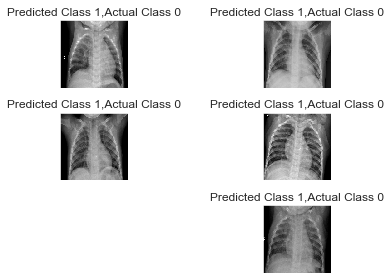

In [24]:
i = 0
for c in incorrect[:6]:
    plt.subplot(3,2,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_test[c].reshape(150,150), cmap="gray", interpolation='none')
    plt.title("Predicted Class {},Actual Class {}".format(predictions[c], y_test[c]))
    plt.tight_layout()
    i += 1